In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset_anuka.zip to dataset_anuka.zip


In [2]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['dataset_anuka.zip']), 'r')
data.extractall()

In [3]:
import os
import keras

In [4]:
dataset_anuka_dir = '/content/dataset_anuka'

In [5]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, min_delta=1e-4)
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_delta=1e-4)
epoch = 30

In [6]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
train_it = datagen.flow_from_directory('/content/dataset_anuka/train', batch_size=64, target_size=(100, 100))
validation_it = datagen.flow_from_directory('/content/dataset_anuka/val', batch_size=64, target_size=(100, 100))
test_it = datagen.flow_from_directory('/content/dataset_anuka/test', batch_size=64, target_size=(100, 100))

Found 1920 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [7]:
classes = ['Tipo A_ Kunzea', 'Tipo B_ Lepto']


---

---Perceptron


In [8]:
input_shape = (100,100,3)

model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(input_shape)),
    keras.layers.Dense(2, activation='sigmoid')
])

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 2)                 60002     
                                                                 
Total params: 60,002
Trainable params: 60,002
Non-trainable params: 0
_________________________________________________________________


In [10]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(input_shape)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [11]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 30000)             0         
                                                                 
 dense_1 (Dense)             (None, 12)                360012    
                                                                 
 dense_2 (Dense)             (None, 2)                 26        
                                                                 
Total params: 360,038
Trainable params: 360,038
Non-trainable params: 0
_________________________________________________________________


In [12]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# fit model
history = model1.fit(
      train_it, 
      steps_per_epoch=len(train_it),
      validation_data=validation_it, 
      validation_steps=len(validation_it), 
      epochs=epoch, 
      verbose=1,
      callbacks=[es, rlrop])

Epoch 1/30
30/30 [==============================] - 5s 48ms/step - loss: 0.4613 - accuracy: 0.7812 - val_loss: 0.3718 - val_accuracy: 0.8375 - lr: 0.0010
Epoch 2/30
30/30 [==============================] - 1s 43ms/step - loss: 0.3299 - accuracy: 0.8693 - val_loss: 0.3746 - val_accuracy: 0.8458 - lr: 0.0010
Epoch 3/30
30/30 [==============================] - 1s 43ms/step - loss: 0.2985 - accuracy: 0.8792 - val_loss: 0.3698 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 4/30
30/30 [==============================] - 1s 43ms/step - loss: 0.2824 - accuracy: 0.8854 - val_loss: 0.3843 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 5/30
30/30 [==============================] - 1s 42ms/step - loss: 0.2783 - accuracy: 0.8870 - val_loss: 0.3747 - val_accuracy: 0.8458 - lr: 0.0010
Epoch 6/30
30/30 [==============================] - 1s 48ms/step - loss: 0.2736 - accuracy: 0.8911 - val_loss: 0.3838 - val_accuracy: 0.8542 - lr: 0.0010
Epoch 7/30
30/30 [==============================] - 1s 44ms/step - loss: 0.2

In [14]:
history2 = model2.fit(
      train_it, 
      steps_per_epoch=len(train_it),
      validation_data=validation_it, 
      validation_steps=len(validation_it), 
      epochs=epoch, 
      verbose=1,      
      callbacks=[es, rlrop])

Epoch 1/30
30/30 [==============================] - 2s 48ms/step - loss: 0.3976 - accuracy: 0.8188 - val_loss: 0.3712 - val_accuracy: 0.8583 - lr: 0.0010
Epoch 2/30
30/30 [==============================] - 1s 44ms/step - loss: 0.2766 - accuracy: 0.8833 - val_loss: 0.3314 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/30
30/30 [==============================] - 1s 45ms/step - loss: 0.2480 - accuracy: 0.9031 - val_loss: 0.2753 - val_accuracy: 0.9125 - lr: 0.0010
Epoch 4/30
30/30 [==============================] - 1s 46ms/step - loss: 0.2114 - accuracy: 0.9187 - val_loss: 0.2629 - val_accuracy: 0.9125 - lr: 0.0010
Epoch 5/30
30/30 [==============================] - 1s 46ms/step - loss: 0.1958 - accuracy: 0.9286 - val_loss: 0.2441 - val_accuracy: 0.9208 - lr: 0.0010
Epoch 6/30
30/30 [==============================] - 1s 45ms/step - loss: 0.1631 - accuracy: 0.9443 - val_loss: 0.2361 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 7/30
30/30 [==============================] - 1s 45ms/step - loss: 0.1

In [15]:
from matplotlib import pyplot
def summarize_diagnostics(history, model_name):
  # plot loss
  pyplot.figure(0)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  pyplot.legend(['loss','val_loss']) 

  # plot accuracy
  pyplot.figure(1)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
  pyplot.legend(['accuracy','val_accuracy'])

  pyplot.savefig('/content/figure-'+ model_name +'.png')

In [16]:
#functions to build confusion matrix
from tqdm import tqdm
import os
import cv2
import numpy as np
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

def load_data(dir_path, img_size=(100,100)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels



def plot_confusion_matrix(cm, model_name, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    pyplot.figure(figsize = (6,6))
    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=90)
    pyplot.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')
    pyplot.savefig('/content/confusionmatrix-'+ model_name +'.png')
    pyplot.show()
    

IMG_SIZE = (100,100)
x_test, y_test, labels = load_data('/content/dataset_anuka/test/', IMG_SIZE)
print(labels)

100%|██████████| 2/2 [00:00<00:00, 30.05it/s]

240 images loaded from /content/dataset_anuka/test/ directory.
{0: 'Tipo A_ Kunzea', 1: 'Tipo B_ Lepto'}


In [17]:
from sklearn.metrics import classification_report
def validateResults(model, model_name):   
  predictions = model.predict(x_test, batch_size=32)
  y_pred = np.argmax(predictions, axis=1) 
  y_true = np.argmax(y_test, axis=0)

  print("\n"+ classification_report(y_test, y_pred, target_names=classes))
  print(confusion_matrix(y_test, y_pred))
  confusion_mtx = confusion_matrix(y_test, y_pred)
  cm = plot_confusion_matrix(confusion_mtx, model_name, classes = list(labels.items()), normalize=False)

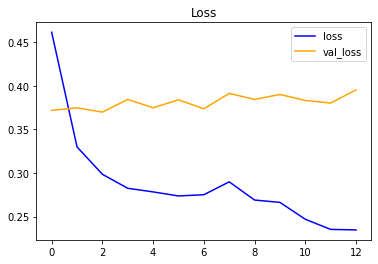

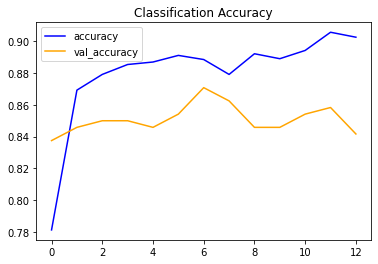

In [18]:
summarize_diagnostics(history, 'model1')


                precision    recall  f1-score   support

Tipo A_ Kunzea       0.84      0.93      0.88       120
 Tipo B_ Lepto       0.92      0.82      0.87       120

      accuracy                           0.88       240
     macro avg       0.88      0.88      0.87       240
  weighted avg       0.88      0.88      0.87       240

[[112   8]
 [ 22  98]]


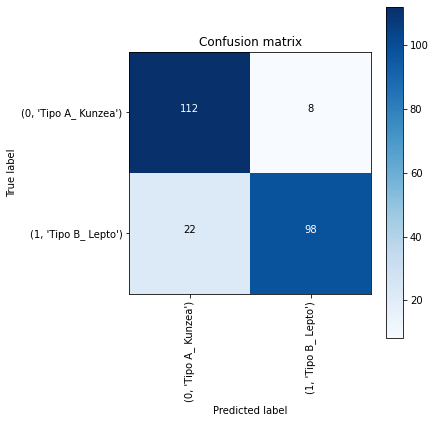

In [19]:
validateResults(model1, 'model1')

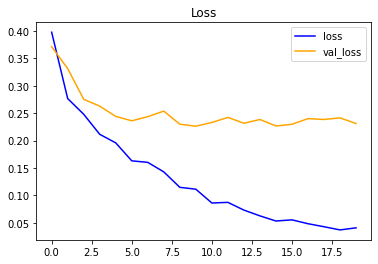

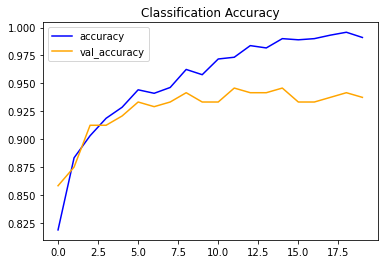

In [20]:
summarize_diagnostics(history2, 'model2')


                precision    recall  f1-score   support

Tipo A_ Kunzea       0.53      0.99      0.69       120
 Tipo B_ Lepto       0.93      0.12      0.21       120

      accuracy                           0.55       240
     macro avg       0.73      0.55      0.45       240
  weighted avg       0.73      0.55      0.45       240

[[119   1]
 [106  14]]


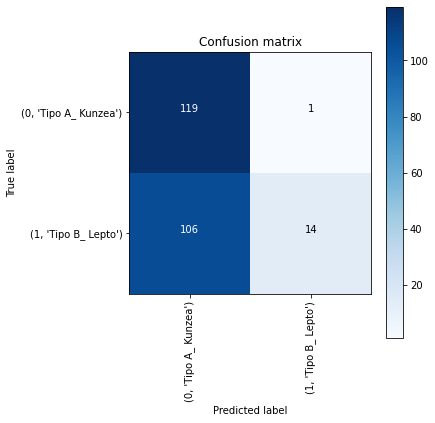

In [21]:
validateResults(model2, 'model2')



---
---CNN


In [22]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [23]:
modelCNN1 = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation="relu", padding="same", input_shape=[100, 100, 3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(64, 3, activation="relu", padding="same"),    
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),    
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),    
    keras.layers.Dense(2, activation="sigmoid")    
])

In [24]:
modelCNN1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)     

In [25]:
modelCNN1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
historyCNN1 = modelCNN1.fit(
      train_it, 
      steps_per_epoch=len(train_it),
      validation_data=validation_it, 
      validation_steps=len(validation_it), 
      epochs=epoch, 
      verbose=1)

Epoch 1/30
30/30 [==============================] - 12s 59ms/step - loss: 0.5182 - accuracy: 0.7417 - val_loss: 0.3865 - val_accuracy: 0.8542
Epoch 2/30
30/30 [==============================] - 2s 50ms/step - loss: 0.3954 - accuracy: 0.8396 - val_loss: 0.3587 - val_accuracy: 0.8708
Epoch 3/30
30/30 [==============================] - 2s 50ms/step - loss: 0.3347 - accuracy: 0.8672 - val_loss: 0.3201 - val_accuracy: 0.8833
Epoch 4/30
30/30 [==============================] - 1s 49ms/step - loss: 0.2931 - accuracy: 0.8906 - val_loss: 0.2950 - val_accuracy: 0.9083
Epoch 5/30
30/30 [==============================] - 2s 51ms/step - loss: 0.2598 - accuracy: 0.8964 - val_loss: 0.2505 - val_accuracy: 0.9208
Epoch 6/30
30/30 [==============================] - 2s 50ms/step - loss: 0.2304 - accuracy: 0.9109 - val_loss: 0.2218 - val_accuracy: 0.9333
Epoch 7/30
30/30 [==============================] - 2s 51ms/step - loss: 0.2137 - accuracy: 0.9120 - val_loss: 0.2164 - val_accuracy: 0.9333
Epoch 8/30
3

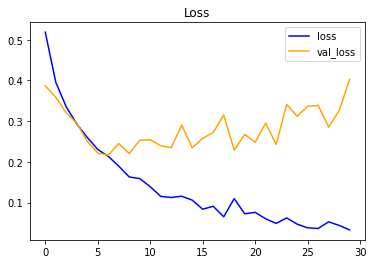

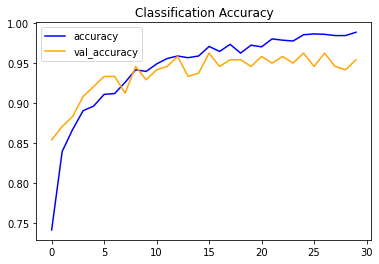

In [27]:
summarize_diagnostics(historyCNN1, 'CNN1')


                precision    recall  f1-score   support

Tipo A_ Kunzea       0.94      0.96      0.95       120
 Tipo B_ Lepto       0.96      0.94      0.95       120

      accuracy                           0.95       240
     macro avg       0.95      0.95      0.95       240
  weighted avg       0.95      0.95      0.95       240

[[115   5]
 [  7 113]]


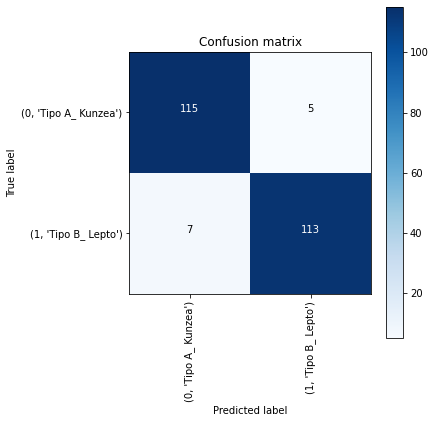

In [28]:
validateResults(modelCNN1, 'CNN1')

In [29]:
#CNN v2
modelCNN2 = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation="relu", input_shape=[100, 100, 3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, 3, activation="relu"),    
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, 3, activation="relu"),    
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),   
    keras.layers.Dense(2, activation="sigmoid")    
])

In [30]:
modelCNN2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 23, 23, 64)       

In [31]:
modelCNN2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_delta=1e-4)

historyCNN2 = modelCNN2.fit(
      train_it, 
      steps_per_epoch=len(train_it),
      validation_data=validation_it, 
      validation_steps=len(validation_it), 
      epochs=epoch, 
      verbose=1,
      callbacks=[rlrop])

Epoch 1/30
30/30 [==============================] - 3s 59ms/step - loss: 0.5608 - accuracy: 0.6990 - val_loss: 0.4045 - val_accuracy: 0.8250 - lr: 0.0010
Epoch 2/30
30/30 [==============================] - 2s 51ms/step - loss: 0.4128 - accuracy: 0.8276 - val_loss: 0.3834 - val_accuracy: 0.8583 - lr: 0.0010
Epoch 3/30
30/30 [==============================] - 2s 51ms/step - loss: 0.3556 - accuracy: 0.8599 - val_loss: 0.3578 - val_accuracy: 0.8542 - lr: 0.0010
Epoch 4/30
30/30 [==============================] - 2s 51ms/step - loss: 0.3263 - accuracy: 0.8677 - val_loss: 0.3048 - val_accuracy: 0.9042 - lr: 0.0010
Epoch 5/30
30/30 [==============================] - 2s 51ms/step - loss: 0.2825 - accuracy: 0.8828 - val_loss: 0.2935 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 6/30
30/30 [==============================] - 2s 51ms/step - loss: 0.2443 - accuracy: 0.9005 - val_loss: 0.2406 - val_accuracy: 0.9250 - lr: 0.0010
Epoch 7/30
30/30 [==============================] - 2s 50ms/step - loss: 0.2

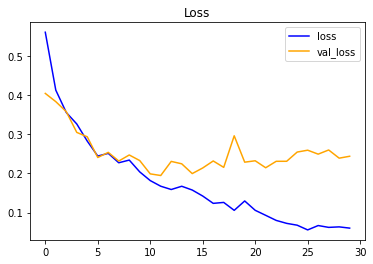

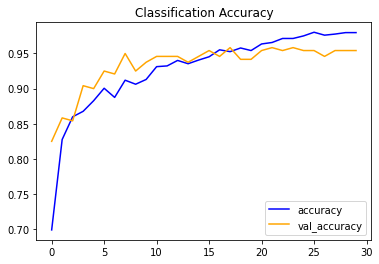

In [33]:
summarize_diagnostics(historyCNN2, 'CNN2')


                precision    recall  f1-score   support

Tipo A_ Kunzea       0.94      0.97      0.96       120
 Tipo B_ Lepto       0.97      0.94      0.96       120

      accuracy                           0.96       240
     macro avg       0.96      0.96      0.96       240
  weighted avg       0.96      0.96      0.96       240

[[117   3]
 [  7 113]]


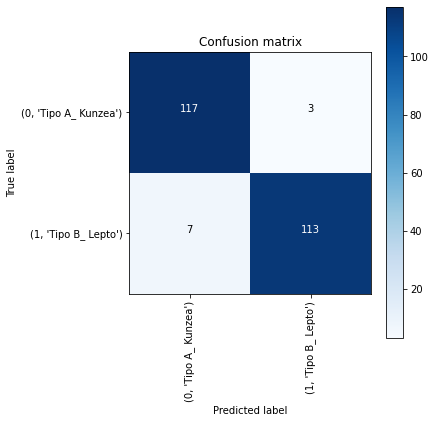

In [34]:
validateResults(modelCNN2, 'CNN2')


---

---VGG16

In [35]:
from google.colab import files
uploaded = files.upload()

Saving dataset_vgg16.zip to dataset_vgg16.zip


In [36]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['dataset_vgg16.zip']), 'r')
data.extractall()

In [37]:
import os

In [38]:
dataset_vgg16_dir = '/content/dataset_vgg16'

In [39]:
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.applications.vgg16 import VGG16
import tensorflow as tf

In [40]:
def BuildVGG16():
  # load model
  model = VGG16(include_top=False, input_shape=(224, 224, 3))
  # mark loaded layers as not trainable
  for layer in model.layers:
    layer.trainable = False
  
  last_layer = model.get_layer('block5_pool')
  last_output = last_layer.output
  x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  x = tf.keras.layers.Dense(2, activation='sigmoid')(x) #2 clases de salida  
  model = tf.keras.Model(model.input, x)  

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [52]:
modelVGG16 = BuildVGG16()
modelVGG16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [53]:
esVGG = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
datagenVGG = ImageDataGenerator(rescale=1./255)
trainVGG_it = datagenVGG.flow_from_directory('/content/dataset_vgg16/train', batch_size=64, target_size=(224, 224))
validationVGG_it = datagenVGG.flow_from_directory('/content/dataset_vgg16/val', batch_size=64, target_size=(224, 224))
testVGG_it = datagenVGG.flow_from_directory('/content/dataset_vgg16/test', batch_size=64, target_size=(224, 224))
# fit model
historyVGG16 = modelVGG16.fit(
      trainVGG_it, 
      steps_per_epoch=len(trainVGG_it),
      validation_data=validationVGG_it, 
      validation_steps=len(testVGG_it), 
      epochs=epoch, 
      verbose=1,
      callbacks=[esVGG])

Found 1920 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Epoch 1/30
30/30 [==============================] - 11s 341ms/step - loss: 0.5954 - accuracy: 0.7260 - val_loss: 0.3031 - val_accuracy: 0.8708
Epoch 2/30
30/30 [==============================] - 10s 317ms/step - loss: 0.3013 - accuracy: 0.8729 - val_loss: 0.2293 - val_accuracy: 0.8833
Epoch 3/30
30/30 [==============================] - 10s 321ms/step - loss: 0.2306 - accuracy: 0.9125 - val_loss: 0.2253 - val_accuracy: 0.8833
Epoch 4/30
30/30 [==============================] - 10s 320ms/step - loss: 0.2152 - accuracy: 0.9156 - val_loss: 0.1881 - val_accuracy: 0.9208
Epoch 5/30
30/30 [==============================] - 10s 322ms/step - loss: 0.1909 - accuracy: 0.9245 - val_loss: 0.1883 - val_accuracy: 0.9167
Epoch 6/30
30/30 [==============================] - 10s 323ms/step - loss: 0.1752 - accuracy: 0.9344 - val_loss: 0.1902 - val_accuracy: 0.9208
Epoch 7/30
30/30 [

In [54]:
xVGG_test, yVGG_test, labelsVGG = load_data('/content/dataset_vgg16/test/')

100%|██████████| 2/2 [00:00<00:00, 18.54it/s]

240 images loaded from /content/dataset_vgg16/test/ directory.


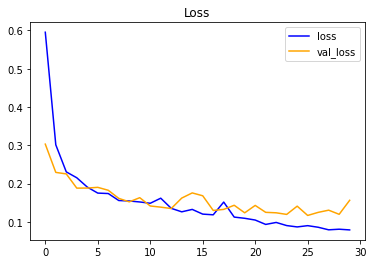

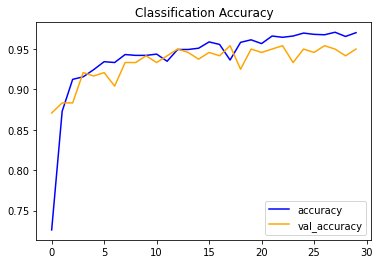

In [55]:
summarize_diagnostics(historyVGG16, 'VGG16')

In [56]:
def validateVGGResults(model, model_name):   
  predictionsVGG = model.predict(xVGG_test, batch_size=32)
  y_pred = np.argmax(predictionsVGG, axis=1) 
  y_true = np.argmax(yVGG_test, axis=0)

  print("\n"+ classification_report(yVGG_test, y_pred, target_names=classes))
  print(confusion_matrix(yVGG_test, y_pred))
  confusion_mtx = confusion_matrix(yVGG_test, y_pred)
  cm = plot_confusion_matrix(confusion_mtx, 'VGG16', classes = list(labelsVGG.items()), normalize=False)


                precision    recall  f1-score   support

Tipo A_ Kunzea       0.72      1.00      0.84       120
 Tipo B_ Lepto       1.00      0.62      0.76       120

      accuracy                           0.81       240
     macro avg       0.86      0.81      0.80       240
  weighted avg       0.86      0.81      0.80       240

[[120   0]
 [ 46  74]]


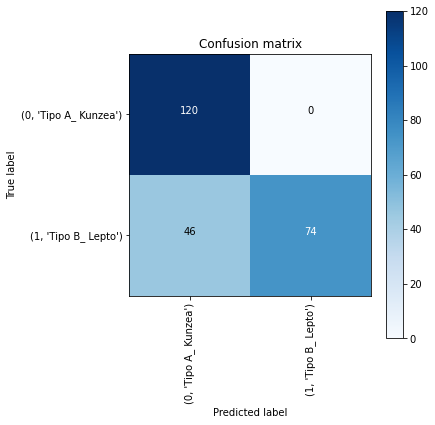

In [57]:
validateVGGResults(modelVGG16, 'VGG16')



---

Gráficos compartidos

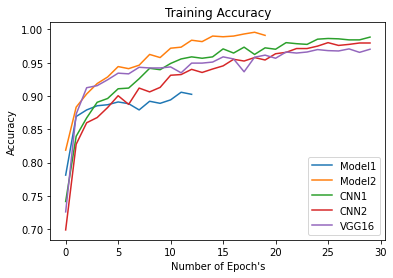

In [71]:
#gráfico compartido accuracy
pyplot.figure()
pyplot.plot( history.history['accuracy'], label = 'Model1')
pyplot.plot( history2.history['accuracy'], label = 'Model2')
pyplot.plot(range(epoch), historyCNN1.history['accuracy'], label = 'CNN1')
pyplot.plot(range(epoch), historyCNN2.history['accuracy'], label = 'CNN2')
pyplot.plot(range(epoch), historyVGG16.history['accuracy'], label = 'VGG16')
pyplot.xlabel("Number of Epoch's")
pyplot.ylabel('Accuracy')
pyplot.title('Training Accuracy')
pyplot.legend(loc = "best")
pyplot.savefig('/content/comparative-accuracy.png')

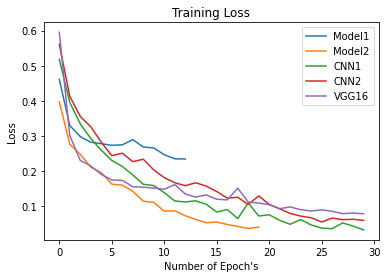

In [70]:
#gráfico compartido loss
pyplot.figure()
pyplot.plot( history.history['loss'], label = 'Model1')
pyplot.plot( history2.history['loss'], label = 'Model2')
pyplot.plot(range(epoch), historyCNN1.history['loss'], label = 'CNN1')
pyplot.plot(range(epoch), historyCNN2.history['loss'], label = 'CNN2')
pyplot.plot(range(epoch), historyVGG16.history['loss'], label = 'VGG16')

pyplot.xlabel("Number of Epoch's")
pyplot.ylabel('Loss')
pyplot.title('Training Loss')
pyplot.legend(loc = "best")
pyplot.savefig('/content/comparative-loss.png')